Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
df = pd.read_csv('train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
print("Dataframe:")
print(df.head(10))

Dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J 

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

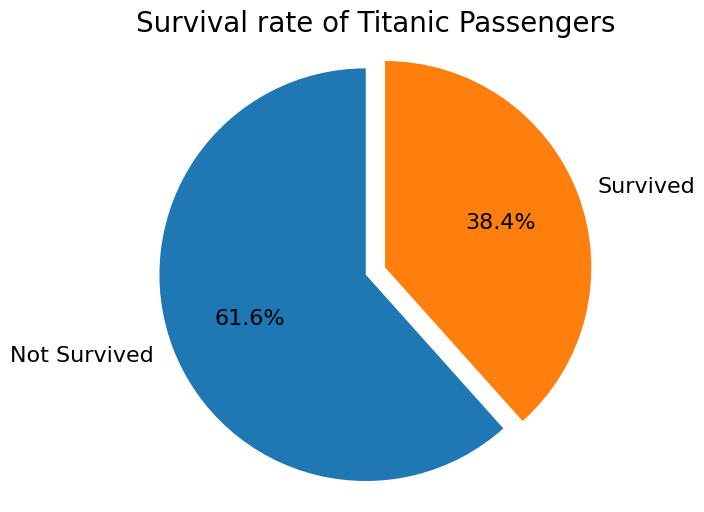

In [5]:
survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survived_counts,
        labels=['Not Survived', 'Survived'],
        explode=(0.05, 0.05),
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 16})
plt.title('Survival rate of Titanic Passengers', fontsize = 20)
plt.axis('equal')
plt.show()

На діаграмі зображено співвідношення між загиблими та врятованими пасажирами. З діаграми видно, що переважна частина пасажирів загинула (61.6%), а врятовано лише 38.4%. З точки зору бізнес цінності ця діаграма дозволяє зрозуміти яка кількість рятувальних шлюпок потенційно була б необхідна для врятування усіх пасажирів (втричі більше, ніж було на кораблі) та оцінити обсяг трагедії.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


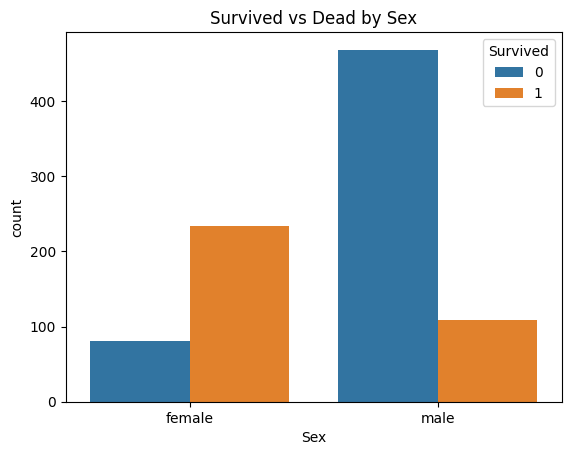

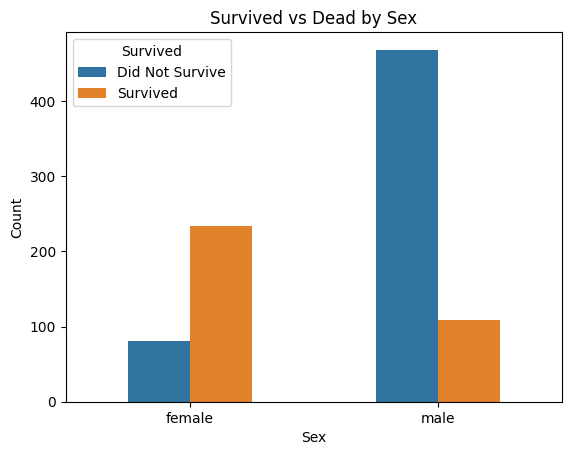

In [9]:
survival_sex = df.groupby(['Sex', 'Survived'], as_index=False).size()

survival_sex_chart = survival_sex.pivot(index='Sex', columns='Survived', values='size').plot(
    kind='bar',
    stacked=False,
    color=['#3274a1', '#e1812c']
)

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

plt.show()

Ця діаграма ілюструє співвідношення загиблих і тих, хто вижив, серед пасажирів, розподілених за статтю.

З аналізу графіку видно, що близько 60% жінок змогли врятуватись. Натомість частка чоловіків, які вижили, становить менше 20% від загальної кількості чоловіків на борту. Порівнюючи стовпці, які показують кількість тих, хто вижив, можна помітити, що, хоча жінок було менше, врятованих серед них майже вдвічі більше, ніж серед чоловіків. Якщо ж порівняти кількість загиблих, то видно, що серед чоловіків вона приблизно в п’ять разів перевищує кількість загиблих жінок.


4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

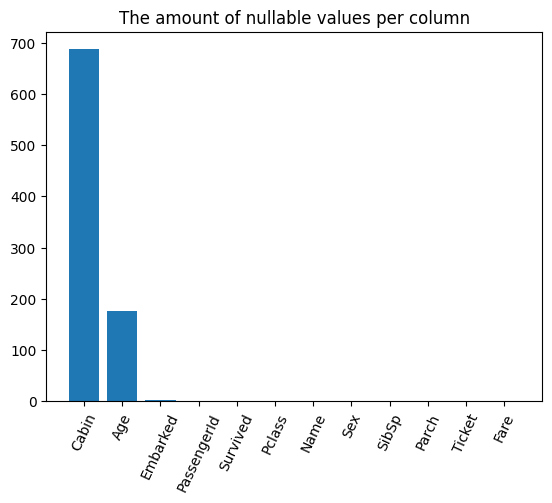

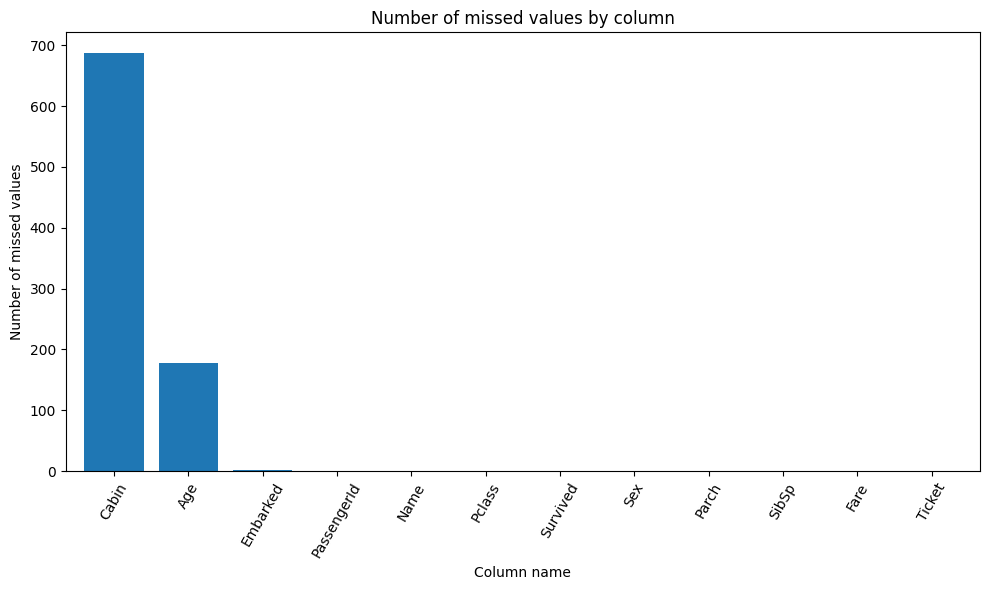

In [11]:
missing_values = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', width=0.8)
plt.title('Number of missed values by column')
plt.xlabel('Column name')
plt.ylabel('Number of missed values')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Дана візуалізація дозволяє швидко визначити, у яких колонках найбільше пропущених значень, що важливо врахувати під час подальшої обробки даних. Завдяки сортуванню стає очевидно, що найбільше пропусків спостерігається в колонках Cabin та Age, тоді як Embarked має лише незначну кількість таких значень. Виходячи з цього, можна зробити припущення, що колонка Cabin малоймовірно буде корисною для подальшого аналізу.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

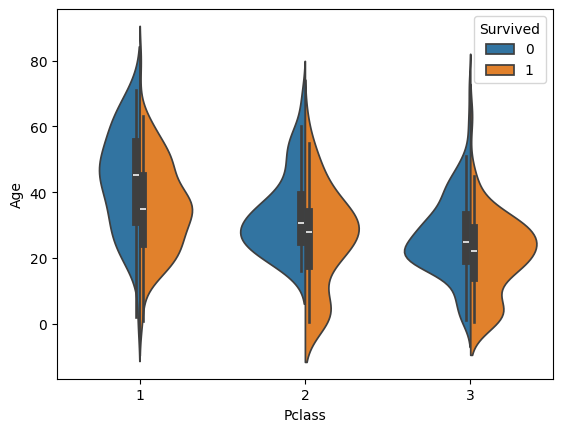

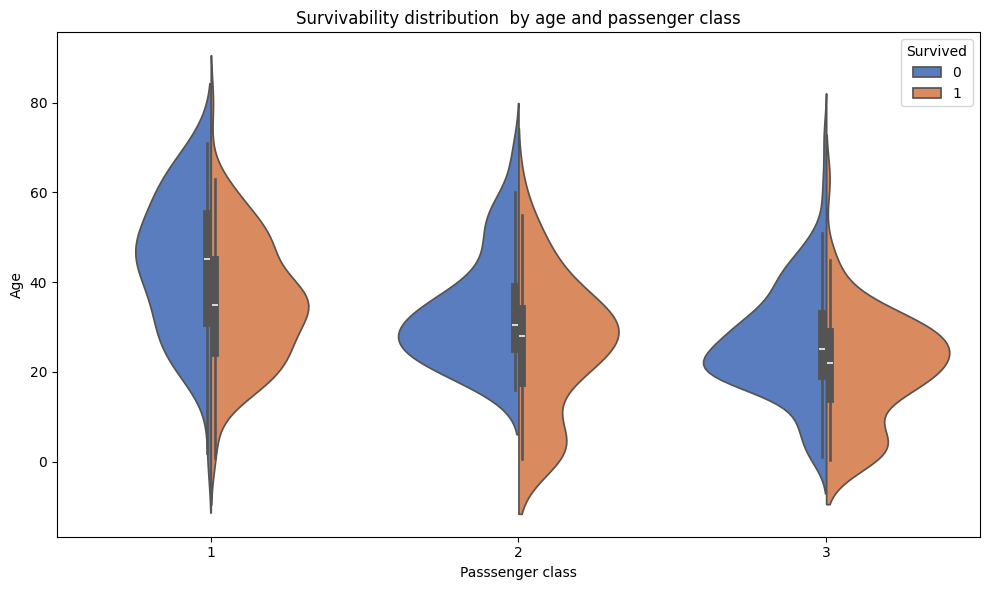

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df,
               split=True, palette='muted')
plt.title('Survivability distribution  by age and passenger class')
plt.xlabel('Passsenger class')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Цей графік дозволяє проаналізувати розподіл загиблих і врятованих пасажирів залежно від їхнього віку та класу, яким вони подорожували. З графіка видно, що пасажири першого класу переважно були у віці від приблизно 18 до 70 років. Серед загиблих переважає вік 30–55 років, а серед врятованих — 18–50 років. У другому класі пасажири були віком від 0 до 60 років. Тут найбільше загиблих — у віковому проміжку 20–40 років, тоді як врятованих також найбільше у цьому ж діапазоні, хоча кількість загиблих переважає. У третьому класі подорожували пасажири у віці від 0 до 65 років. Найбільше загиблих — серед людей віком 10–35/40 років, а врятованих — здебільшого серед вікової групи 20–30 років.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


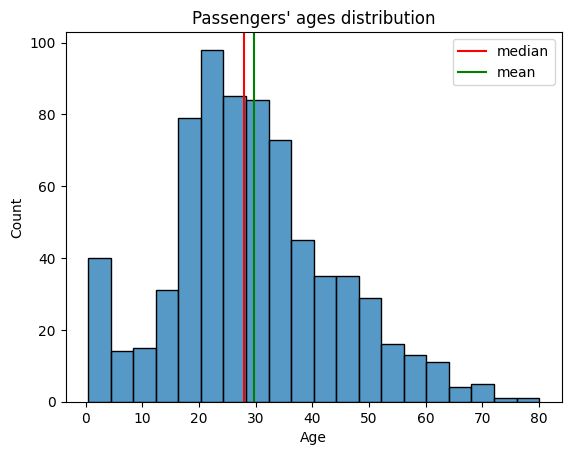

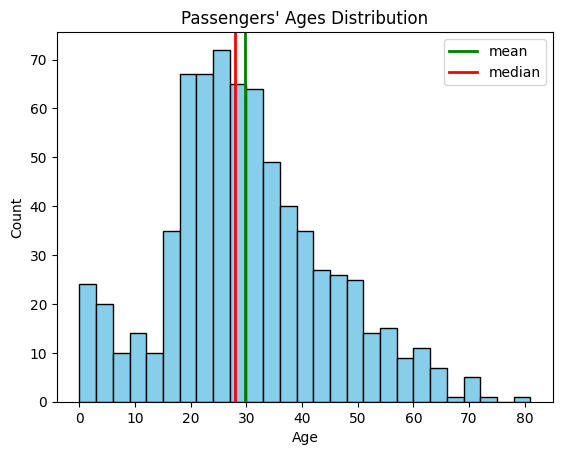

In [14]:
plt.hist(df['Age'], bins=range(0, 84, 3), color='skyblue', edgecolor='black')

mean_age = df['Age'].mean()
median_age = df['Age'].median()

plt.axvline(mean_age, color='green', linewidth=2, label='mean')
plt.axvline(median_age, color='red', linewidth=2, label='median')

plt.title("Passengers' Ages Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

Цей графік ілюструє розподіл пасажирів за віком: висота стовпців відображає кількість пасажирів певного віку, а вертикальні лінії вказують на середнє та медіанне значення віку у вибірці. З графіка видно, що середній вік пасажирів становив близько 30 років, тоді як медіанний — приблизно 28 років, тобто обидва показники доволі близькі. Найбільше пасажирів було у віковому діапазоні від 18 до 40 років. Також помітно, що дітей на борту було значно більше, ніж осіб літнього віку. Це, ймовірно, пояснюється тим, що родини подорожували разом.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи існує зв'язок між вартістю квитка (Fare) та ймовірністю виживання?

<ipython-input-24-cbbb4607d2be>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby('FareRange')['Survived'].mean().reset_index()


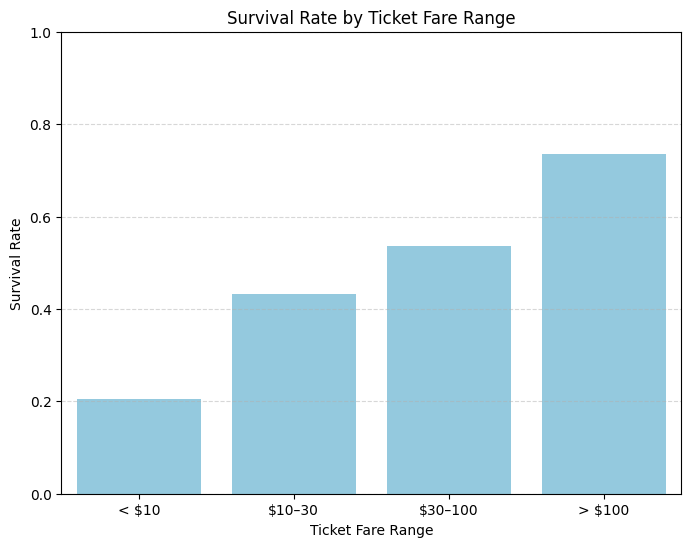

In [24]:
bins = [0, 10, 30, 100, df['Fare'].max()]
labels = ['< $10', '$10–30', '$30–100', '> $100']
df['FareRange'] = pd.cut(df['Fare'], bins=bins, labels=labels)

survival_rates = df.groupby('FareRange')['Survived'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=survival_rates, x='FareRange', y='Survived', color='skyblue')

plt.title('Survival Rate by Ticket Fare Range')
plt.xlabel('Ticket Fare Range')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Графік показує, що вартість квитка істотно впливала на ймовірність виживання. Це підтверджує, що пасажири з вищим соціальним статусом (який часто корелює з ціною квитка) мали кращі умови для евакуації.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

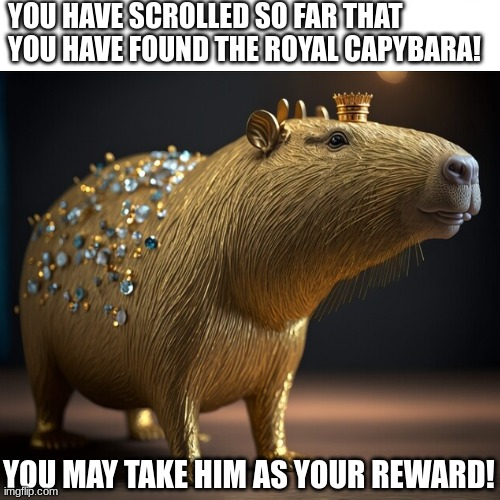